This notebook introduces the ForestLAS package developed to analyse LiDAR data in a (mostly!*) purely Python workflow. Firstly we will run through some basic functioanlity of ForestLAS, importing and exporting .las files, then look at creating canopy height profiles at the plot scale before finally applying this to a larger area.
* requires lastools if using compressed .laz files

In [18]:
# required for demonstration
import os, glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

temporary directory at: c:\users\marcus\appdata\local\temp\lidar.processing.7455757.tmp
number of tiles to process: 1
0.0% | 0 of 901 points processed | 2021-02-26 13:54:09.691000
5.0% | 45 of 901 points processed | 2021-02-26 13:54:09.704000
10.0% | 90 of 901 points processed | 2021-02-26 13:54:09.715000
15.0% | 135 of 901 points processed | 2021-02-26 13:54:09.726000
20.0% | 180 of 901 points processed | 2021-02-26 13:54:09.738000
25.0% | 225 of 901 points processed | 2021-02-26 13:54:09.752000
30.0% | 270 of 901 points processed | 2021-02-26 13:54:09.766000
35.0% | 315 of 901 points processed | 2021-02-26 13:54:09.775000
40.0% | 360 of 901 points processed | 2021-02-26 13:54:09.784000
45.0% | 405 of 901 points processed | 2021-02-26 13:54:09.794000
50.0% | 450 of 901 points processed | 2021-02-26 13:54:09.803000
55.0% | 495 of 901 points processed | 2021-02-26 13:54:09.812000
60.0% | 540 of 901 points processed | 2021-02-26 13:54:09.823000
65.0% | 585 of 901 points processed | 2021-

Text(0.5,0,'number of returns')

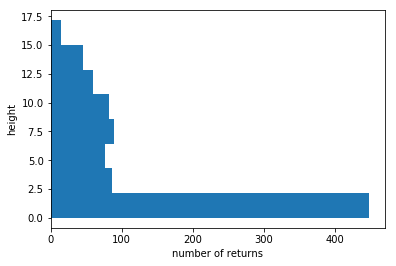

In [19]:
# import lasIO from ForestLAS
from forestlas import lasIO

# reads .las file "WC1.las" including all point metadata in verbose mode
las = lasIO.lasIO(os.path.join(os.getcwd(), 'SLU_laserdata/all_las/831540112830.las'), keepTemp=True,
                  verbose=True)

# returns as an numpy array
lasAll = las.all().asArray()

# plot histogram of height
plt.hist(lasAll['z'], 
         (lasAll['z'].max() / 2).astype(int), 
         orientation="horizontal")
plt.ylabel("height")
plt.xlabel("number of returns")

number of plots: 16
0.0% | 0 of 901 points selected | 2021-02-26 13:56:23.076000
5.0% | 45 of 901 points selected | 2021-02-26 13:56:23.087000
10.0% | 90 of 901 points selected | 2021-02-26 13:56:23.102000
15.0% | 135 of 901 points selected | 2021-02-26 13:56:23.119000
20.0% | 180 of 901 points selected | 2021-02-26 13:56:23.134000
25.0% | 225 of 901 points selected | 2021-02-26 13:56:23.145000
30.0% | 270 of 901 points selected | 2021-02-26 13:56:23.158000
35.0% | 315 of 901 points selected | 2021-02-26 13:56:23.174000
40.0% | 360 of 901 points selected | 2021-02-26 13:56:23.185000
45.0% | 405 of 901 points selected | 2021-02-26 13:56:23.196000
50.0% | 450 of 901 points selected | 2021-02-26 13:56:23.207000
55.0% | 495 of 901 points selected | 2021-02-26 13:56:23.219000
60.0% | 540 of 901 points selected | 2021-02-26 13:56:23.231000
65.0% | 585 of 901 points selected | 2021-02-26 13:56:23.242000
70.0% | 630 of 901 points selected | 2021-02-26 13:56:23.253000
75.0% | 675 of 901 points 

IndexError: index 3 is out of bounds for axis 0 with size 3

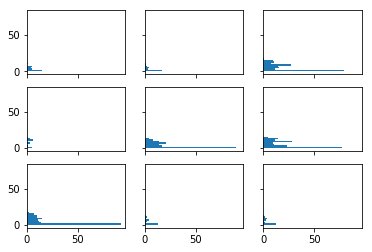

In [23]:
# data can also be tiled
# here we tile a plot into 9 subplots...
lasTiles = las.tiling(8).asArray()

# ...and plot histograms of height
f, a = plt.subplots(3, 3, sharex=True, sharey=True)
for i, tile in enumerate(lasTiles): 
    ax = a[i//3][i%3]
    ax.hist(tile['z'], bins=40, range=(0, 80), orientation="horizontal")
f.subplots_adjust(hspace=0, wspace=0)

temporary directory at: c:\users\marcus\appdata\local\temp\lidar.processing.2557009.tmp
number of tiles to process: 1
0.0% | 0 of 901 points processed | 2021-02-26 13:57:14.094000
5.0% | 45 of 901 points processed | 2021-02-26 13:57:14.107000
10.0% | 90 of 901 points processed | 2021-02-26 13:57:14.119000
15.0% | 135 of 901 points processed | 2021-02-26 13:57:14.129000
20.0% | 180 of 901 points processed | 2021-02-26 13:57:14.140000
25.0% | 225 of 901 points processed | 2021-02-26 13:57:14.149000
30.0% | 270 of 901 points processed | 2021-02-26 13:57:14.166000
35.0% | 315 of 901 points processed | 2021-02-26 13:57:14.177000
40.0% | 360 of 901 points processed | 2021-02-26 13:57:14.189000
45.0% | 405 of 901 points processed | 2021-02-26 13:57:14.201000
50.0% | 450 of 901 points processed | 2021-02-26 13:57:14.211000
55.0% | 495 of 901 points processed | 2021-02-26 13:57:14.220000
60.0% | 540 of 901 points processed | 2021-02-26 13:57:14.229000
65.0% | 585 of 901 points processed | 2021-

TypeError: list indices must be integers, not str

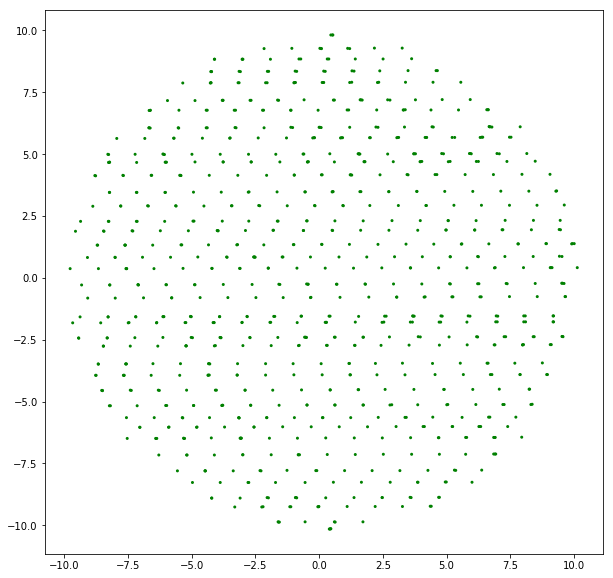

In [25]:
# THESE NEEDS TO BE RE-RUN WHEN CHANGING 'round' = True/False
# reads .las file "WC1.las" including all point metadata in verbose mode
las = lasIO.lasIO(os.path.join(os.getcwd(), 'SLU_laserdata/all_las/831540112830.las'), keepTemp=True,
                  verbose=True)
# returns as an numpy array
lasAll = las.all().asArray()

# data can also be extracted as a subplot
# first extract the plot centre coordinates
header = lasIO.parseHeader(os.path.join(os.getcwd(), 'WC1.las'))
x = np.mean([header["xmin"], header["xmax"]])
y = np.mean([header["ymin"], header["ymax"]])

# then extract returns from a 5 m diameter from the plot centre
# lasSubPlot = las.plot(x, y, radius=5, round=True).asArray()

lasSubPlot = las.plot(x, y, extent=5, round=True).asArray()

# and graph the complete plot and the subset
plt.figure(figsize=(10,10))

plt.scatter(lasAll['x'], lasAll['y'], marker=".",
            c="green", edgecolor="none")
plt.scatter(lasSubPlot['x'], lasSubPlot['y'], marker=".", 
            c="red", edgecolor="none")

In [11]:
# las files can be manipulated and then saved out
lasFirst = lasAll[lasAll['rtn_num'] == 1]
las.np2LAS(lasFirst, out=os.path.join(os.getcwd(), 'firstReturns.las'))

# check that
print lasIO.parseHeader(os.path.join(os.getcwd(), 'WC1.las'))["numptbyreturn"]
print lasIO.parseHeader(os.path.join(os.getcwd(), 'firstReturns.las'))["numptbyreturn"]

.las file written to C:\Bibliotek\Skolgrejs\forestlas\firstReturns.las
(2568, 1670, 578, 92, 7)
(2568, 0, 0, 0, 0)


In [7]:
# finally there is an option to remove all temporary files and directories,
# this can be set as an option using lasIO.lasIO(keepTemp=False)
http://localhost:8888/notebooks/forestlas_intro.ipynb#las.removeTemp()

SyntaxError: invalid syntax (<ipython-input-7-c93a4d0a5aba>, line 3)

## Lets now create a canopy height profile

In [12]:
from forestlas import canopyComplexity as cc

forestlas\canopyComplexity.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.z = self.z[idx] # ...from z
forestlas\canopyComplexity.py:61: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.zw = rtn_weight[idx] # ... and from weighted heights
forestlas\canopyComplexity.py:88: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a diffe

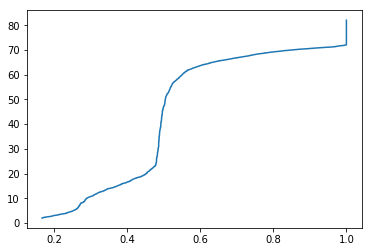

In [13]:
# canopy height profiles are created from gap probability
# canopyComplexity calls lasIO so there is no need to bring in .las files beforehand

las = cc.CanopyComplexity().fromLAS(os.path.join(os.getcwd(), 'WC1.las'))
pg = las.Pgap()

# lets take a look for our plot
plt.plot(pg.pgap, pg.zxOrig)

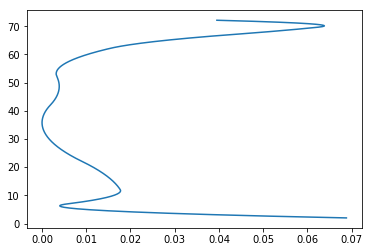

In [38]:
#%autoreload 2
# if we plot the first derivative of this we see the CHP is 
# pretty noisy! Alpha is set to 0 so there is no smoothing
# applied
chp = las.CHP(alpha=0.3)
plt.plot(chp.fd, chp.zx)

72.11


C:\Users\Marcus\.conda\envs\python27\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


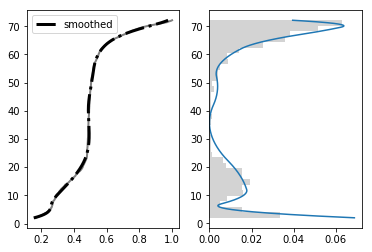

In [37]:
# through a supervised classification and cross validation an alpha
# parameter of 0.3 was identified as a suboptimal value for the 
# nonparametric spline smoothing (this is the default)

chp = cc.CanopyComplexity().fromLAS(os.path.join(os.getcwd(), 'WC1.las')).CHP()

# freq = cc.CanopyComplexity().fromLAS(os.path.join(lasFiles, "WC6.las"))
# freq = freq.canopyHeightProfile(frequency=True)

plt.subplot(121)
plt.plot(chp.pgap, chp.zx, "-", color="grey", linewidth=2)
plt.plot(chp.ps, chp.zx, "-.", color="black", linewidth=3, label="smoothed")
plt.legend(loc=2)

plt.subplot(122)
plt.plot(chp.fd, chp.zx)
#plt.plot(freq.fd, freq.zx, "r")
h, b = np.histogram(chp.z, (chp.z.max() / 2).astype(int), normed=True)
plt.barh(b[1:] - 1, h * (1 - chp.pgap.min()), height=2, fc="lightgrey")
print chp.z.max()

In [39]:
chp.z

array([ 6.41, 62.17, 65.12, ...,  7.05,  6.78,  3.11])

Number of canopy layers: 3


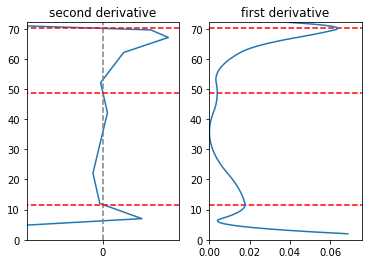

In [40]:
# from smmothed estimate of Pgap we can then take the second
# derivative to estimate the number of canopy layers

plt.subplot(121)
plt.plot(chp.sd, chp.zx)
plt.xlim(-0.01, 0.01)
plt.plot([0, 0], [0, 80], "--", color="grey")
for layer in chp.layerLocation:
    plt.plot([-1, 1], [layer, layer], "--r",)
plt.xticks([0])
plt.title("second derivative")
plt.ylim(0, chp.z.max())

plt.subplot(122)
for layer in chp.layerLocation:
    plt.plot([0, 1], [layer, layer], "--r",)
plt.plot(chp.fd, chp.zx)
plt.xlim(0, chp.fd.max() * 1.1)
plt.title("first derivative")
plt.ylim(0, chp.z.max())

print "Number of canopy layers:", chp.layerCount

Text(0,0.5,'probsbility')

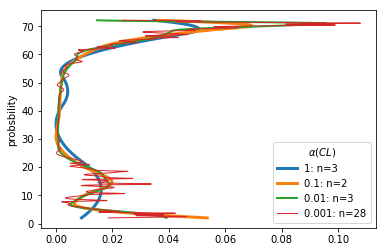

In [41]:
# 3 canopy layers may be considered an overestimtion of CL,
# one solution is to change the alpha paramter in the 
# las.canopyHeightProfile(alpha=x) call

for i, (alpha, lw) in enumerate(zip([1, 0.1, 0.01, 0.001],
                                    [3, 3, 2, 1])):
    chp = las.CHP(alpha=alpha)
    plt.plot(chp.fd, chp.zx, linewidth=lw, 
             label="{}: n={}".format(alpha, chp.layerCount),
             zorder=i)
    
plt.legend(loc="best", title=r"$\alpha (CL)$")
plt.ylabel("height (m)")
plt.ylabel("probsbility")

forestlas\canopyComplexity.py:196: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  NoR = self.zw[idx] # total number of returns for returns in range h to h+1


Text(0.12,0,'N.B. local maxima which are <5% of the largest peak are not counted')

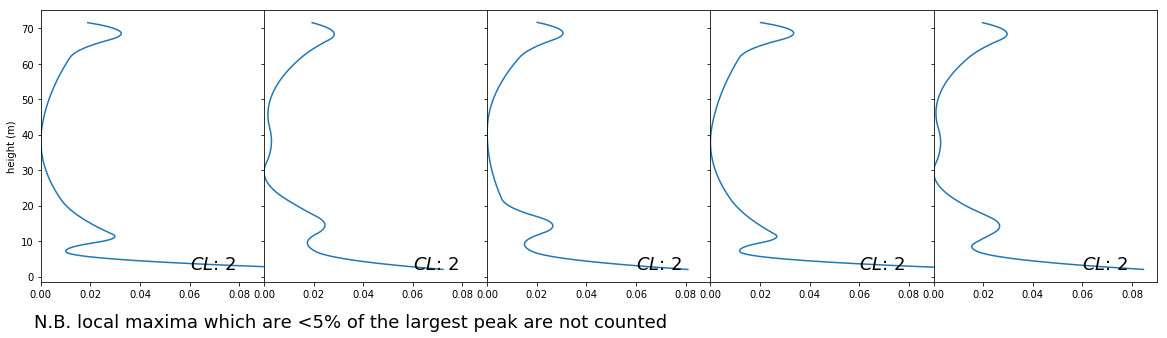

In [43]:
#%autoreload 2
# We can take a closer look at individual iterations to see how 
# the CHP configuration changes

f, a = plt.subplots(1, 5, figsize=(20, 5), sharey=True, sharex=True)
las = cc.CanopyComplexity().fromLAS(os.path.join(os.getcwd(), "WC1.las")).CHP("model")

for bsi in xrange(5):
    ax = a[bsi]
    zs = las.simulateCloud()
    CHPi = cc.CanopyComplexity().fromLAS(zs).CHP()
    ax.plot(CHPi.fd, CHPi.zx)
    ax.text(0.06, 2, 
            "$CL$: {}".format(CHPi.layerCount),
            fontsize=18)
    if bsi == 0:    
        ax.set_ylabel("height (m)")
    ax.set_xlim(0, 0.09)
        
f.subplots_adjust(hspace=0, wspace=0)
f.text(0.12, 0, "N.B. local maxima which are <5% of the largest peak are not counted", fontsize=18)

In [62]:
# THIS WILL REQUIRE YOUR OWN SET OF .las FILES

# Instead of passing a single .las file the function will also accept a 
# directory, and in this instance will run across multiple CPU's.  
# The default number is 4 CPU;s; this can be changed by passing the 
# argument processes=x
#
# An example of a command if running on a server with multiple CPU's could be:
# bs = cc.bootstrapComplexity(os.getcwd(), N=100, processes=20, verbose=False)

#os.chdir(lasFiles)
#lasList = glob.glob(os.path.join(os.getcwd(), 'forestlas', 'las', '*.las'))
#bsMulti = cc.bootstrapComplexity(lasList, N=5, processes=4, verbose=True)

lasList = glob.glob(os.path.join(os.getcwd(), 'SLU_laserdata', 'all_las', '*.las'))
bsMulti = cc.bootstrapComplexity(lasList, N=20, processes=4, verbose=True)

for plot in bsMulti.bsCHPmutiple.keys():
    print plot, bsMulti.bsCHPmutiple[plot].mean()

831540412830 0.2
831555112832 0.4
831555106830 0.0
831540112830 0.05
831540212830 0.15
831555206830 0.0
831540206830 0.0
831540306830 0.25
831555212830 0.9


TypeError: chp() takes exactly 2 arguments (1 given)

In [ ]:
# THIS HASN"T BEEN TESTED IN A WHILE!

# Finally we can create continous layers from ALS captured over a wider area.
# This can take a while on a desktop computer, so to illustrate the point we 
# make a canopy height and canopy height profile layer from a smaller area.

from forestlas import woodyAttribute as wa

# first create tiles
lasIO.lasIO('LARGE.las', out=os.getcwd(), verbose=True).tiling(25).exportLAS()

# then attribution layer
CH = wa.woodyAttribute(maxProcess=4, verbose=True).canopyComplexity(os.path.join(os.getcwd(), "LARGE_25m_TILES"), N=10)
# Output can be accessed as an numpy array
# Ar = CH.asArray()

# to export as a tiff requires the installation of GDAL
CH.exportTiff(os.path.join(os.getcwd(), "largeTileExample.tif"))

# Height can also be computed in this way using
#height = wa.woodyAttribute(maxProcess=4, verbose=False).canopyHeight(os.path.join(lasFiles, "large_tile", "WC45_SUB_25m_TILES"))
#height.exportTiff(os.path.join(lasFiles, "largeTileHeight.tif"))